# Load PAT module and packages

In [7]:
%load_ext autoreload
%autoreload 2
from pat import data, utils
import json, os, glob
import pandas as pd, numpy as np
%matplotlib inline
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('white')
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 # Load data

In [24]:
fnames = np.sort(glob.glob('output/json/*_keypoints.json'))
new_df_fname = 'output/Sherlock.csv'
col_names = ['fname', 'frame', 'key','keyID', 'personID','value']
if not os.path.exists(new_df_fname):
    for fname in tqdm(fnames[:3500]):
        frame_no = os.path.split(fname)[1].split('_')[1]
        utils.load_keypoints(fname, frame_no = frame_no).to_csv(new_df_fname, index=False, header=False, mode='a')
    df = pd.read_csv(new_df_fname, header=None, names=col_names)
else:
    df = pd.read_csv(new_df_fname, header=None, names=col_names)

100%|██████████| 3500/3500 [02:45<00:00, 21.19it/s] 


# Run some examples of manipulations

(202616, 6) Keypoints
(199950, 6) Keypoints


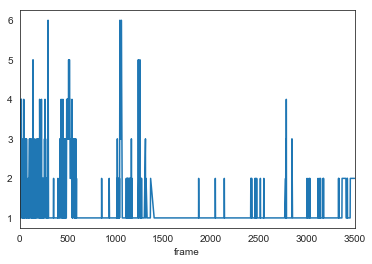

(2018,)
(2666, 75) Pose2D
(2666, 276)
(1150, 75) Keypoints


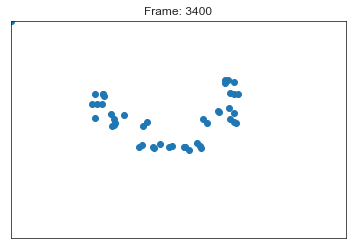

In [57]:
df = pd.read_csv(new_df_fname, header=None, names=col_names)
print(df.shape, df.pat._type)

df = df.pat.grab_pose()
print(df.shape, df.pat._type)

no_people_per_frame = df.pat.grab_people()
no_people_per_frame.plot()
plt.show()
print(no_people_per_frame.shape)

pose_df = df.pat.grab_person_pose() 
print(pose_df.shape, pose_df.pat._type)

rdms = pose_df.pat.extract_distance()
print(rdms.shape)

filtered = pose_df.pat.filter_pose_confidence()
print(filtered.shape, filtered.pat._type)

pose_df.pat.plot(frame_no=3400);

# Plot distance matrix of joints and scatterplot together. 

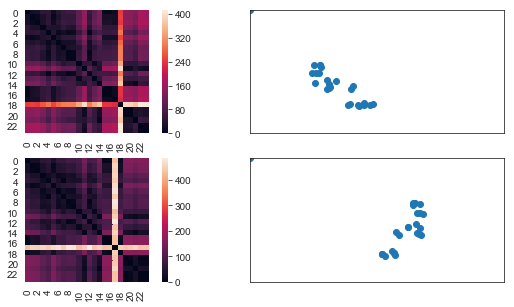

In [60]:
from scipy.spatial.distance import squareform
frame_no = 3400
_df = pose_df.query('frame==@frame_no')
f,axes = plt.subplots(2,2,figsize=(10,5))
for row in range(pose_df.query('frame==3400').shape[0]):
    xs = _df.iloc[row,::3]
    ys = _df.iloc[row,1::3]
    rdm = rdms.query('frame==3400').iloc[row,:]
    sns.heatmap((squareform(rdm)), ax=axes[row, 0], square=True)
    axes[row,1].scatter(xs,ys)
    axes[row,1].axes.set_xscale('linear')
    axes[row,1].axes.set_yscale('linear')
    axes[row,1].set(xlim=[0,640], ylim=[0,360], xticks=[], xticklabels=[], yticklabels=[])
    axes[row,1].set_ylim(axes[row,1].get_ylim()[::-1])